## 1. Use Google Drive link to view a folder I shared with @columbia.edu google drive users
https://drive.google.com/drive/folders/18O-BnGOIw9ZiUwy17Uk_361xyfTF-qAN?usp=sharing
## 2. Right click folder and click "Add shortcut to Drive"
This will make sure the zipfile in this folder is accessible in your personal drive folder


## GitHub:
Yuxi Xiao,

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML

In [ ]:
# Step 2.1
Image(url= "https://github.com/user-attachments/assets/6515aa71-484b-4364-ac44-2331477720e8", width=600, height=300)

In [ ]:
# Step 2.2
Image(url= "https://github.com/user-attachments/assets/0d0d8f6c-a868-49c4-9e38-54f3006af39b", width=600, height=300)

## 3. Reference Code for Project 2

In [ ]:
# Connect to google drive
import os
from google.colab import drive
drive.mount('/content/drive')

# content in your drive is now available via "/content/drive/My Drive"


Mounted at /content/drive


In [ ]:
# Import data and unzip files to folder
!unzip /content/drive/MyDrive/COVID-19_Radiography_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7933.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7934.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7935.png  
 

In [ ]:
# Load libraries and then download data

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3


In [ ]:
# Extracting all filenames iteratively
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]
[['COVID-19_Radiography_Dataset/COVID/images/COVID-1132.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-725.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-69.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-951.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2863.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-694.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1982.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1821.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2759.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1172.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-664.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1880.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1630.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-835.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-187.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3

In [ ]:
#Reduce number of images to first 1345 for each category
fnames[0]=fnames[0][0:1344]
fnames[1]=fnames[1][0:1344]
fnames[2]=fnames[2][0:1344]

In [ ]:
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.
from keras.preprocessing import image
import numpy as np
from PIL import Image

def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img



#Try on single flower file (imports file and preprocesses it to data with following shape)
preprocessor('COVID-19_Radiography_Dataset/COVID/images/COVID-2273.png').shape

(192, 192, 3)

In [ ]:
#Import image files iteratively and preprocess them into array of correctly structured data

# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]

# Iteratively import and preprocess data using map function

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor,image_filepaths ))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [ ]:
len(image_filepaths)

4032

In [ ]:
print(len(X) ) #same number of elements as filenames
print(X.shape ) #dimensions now 192,192,3 for all images
print(X.min().round() ) #min value of every image is zero
print(X.max() ) #max value of every image is one


4032
(4032, 192, 192, 3)
-0.0
1.0


In [ ]:
len(fnames[2])

1344

In [ ]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat

# Recall that we have five folders with the following number of images in each folder
#...corresponding to each flower type

print('number of images for each category:', [len(f) for f in fnames])
covid=list(repeat("COVID", 1344))
normal=list(repeat("NORMAL", 1344))
pneumonia=list(repeat("PNEUMONIA", 1344))

#combine into single list of y labels
y_labels = covid+normal+pneumonia

#check length, same as X above
print(len(y_labels) )

# Need to one hot encode for Keras.  Let's use Pandas

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

number of images for each category: [1344, 1344, 1344]
4032


,COVID,NORMAL,PNEUMONIA
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
4027,False,False,True
4028,False,False,True
4029,False,False,True
4030,False,False,True


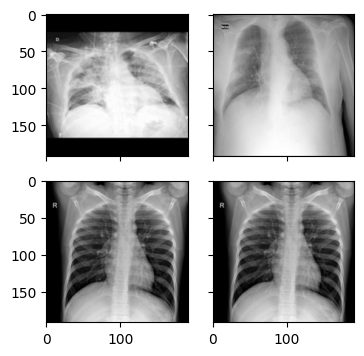

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

im1 =preprocessor(fnames[0][0])
im2 =preprocessor(fnames[0][1])
im3 =preprocessor(fnames[1][1])
im4 =preprocessor(fnames[1][1])

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

In [ ]:
# ======Train test split resized images (Hackathon Note!! Use same train test split to be able to submit predictions to leaderboard!)=======================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.32, random_state = 1987)


X_test.shape, y_test.shape

((1291, 192, 192, 3), (1291, 3))

In [ ]:
#Clear objects from memory
del(X)
del(y)
del(preprocessed_image_data)

In [ ]:
#Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
import pickle

# Open a file and use dump()
with open('X_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train, file)

with open('X_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_test, file)

with open('y_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train, file)

with open('y_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_test, file)

In [ ]:
#If you run out of Colab memory restart runtime, reload data and try again
import pickle

# Open the file in binary mode
with open('X_train.pkl', 'rb') as file:
    # Call load method to deserialze
    X_train = pickle.load(file)

# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

=== Original Dataset Distribution ===
COVID-19: 3616 images (23.9%)
Normal: 10192 images (67.3%)
Viral Pneumonia: 1345 images (8.9%)
Total: 15153 images


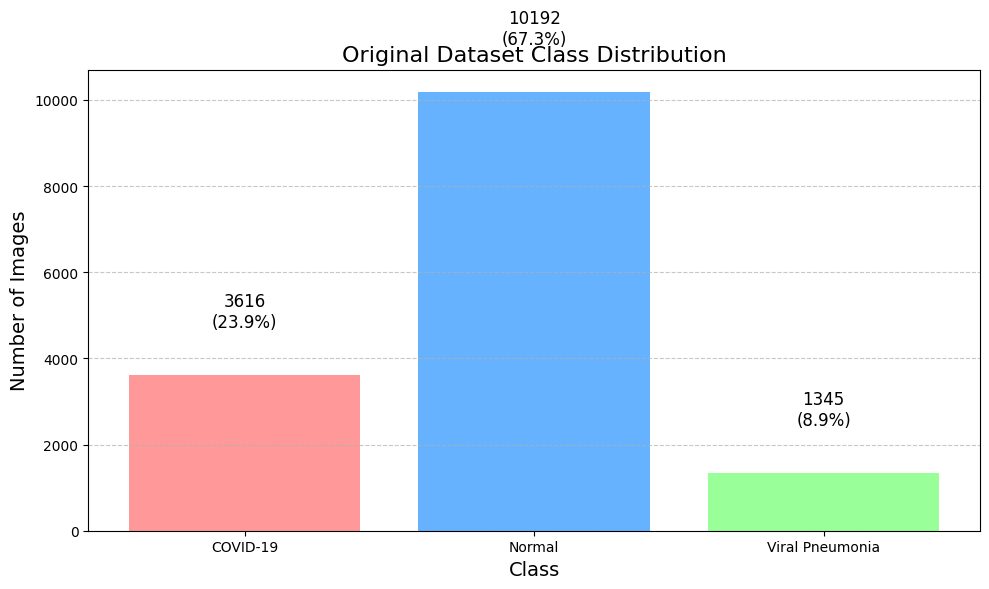

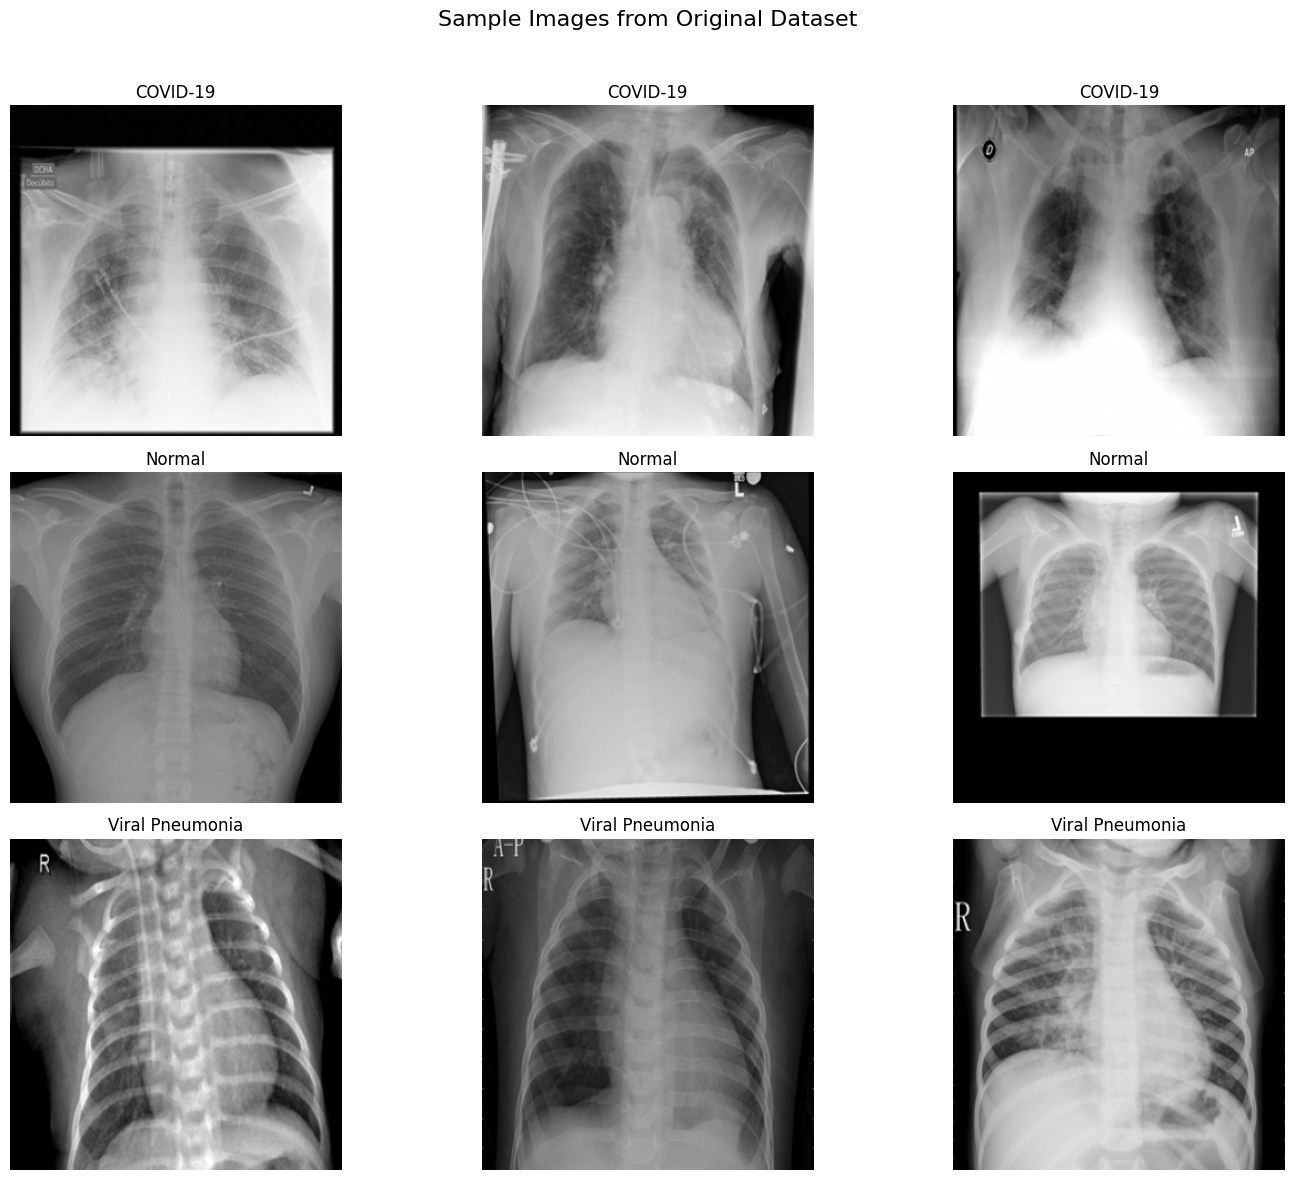


=== Dataset Information ===
The COVID-19 Radiography Dataset contains chest X-ray images in three categories:
- COVID-19: X-rays from patients with confirmed COVID-19
- Normal: X-rays from healthy individuals
- Viral Pneumonia: X-rays from patients with non-COVID viral pneumonia

All images appear to be standardized to 299×299 pixels, which was likely done
during the dataset preparation in the give data file.

The dataset shows significant class imbalance, with Normal X-rays being the majority class
(67.3% of images) and Viral Pneumonia being the minority class (8.9% of images).


In [ ]:
# 1.1 Original Dataset Analysis (before preprocessing)
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
import random

# Define the dataset path
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# Function to count files in each category folder
def count_files_in_folders(base_path, categories):
    counts = []
    for category in categories:
        folder_path = os.path.join(base_path, category)
        if os.path.exists(folder_path):
            files = os.listdir(folder_path)
            # Only count image files
            image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            counts.append(len(image_files))
        else:
            print(f"Warning: Path {folder_path} does not exist")
            counts.append(0)
    return counts

# Count files in each category
file_counts = count_files_in_folders(base_path, categories)
class_names = ["COVID-19", "Normal", "Viral Pneumonia"]

# Display original dataset distribution
print("=== Original Dataset Distribution ===")
total_files = sum(file_counts)
for i, (category, count) in enumerate(zip(class_names, file_counts)):
    percentage = (count / total_files) * 100
    print(f"{category}: {count} images ({percentage:.1f}%)")
print(f"Total: {total_files} images")

# Plot original dataset distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, file_counts, color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Original Dataset Class Distribution', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count and percentage labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (file_counts[i] / total_files) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1*max(file_counts),
             f'{file_counts[i]}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Display random samples from the original dataset
def display_original_samples(base_path, categories, class_names, samples_per_class=3):
    """Display random samples from each class in the original dataset"""
    fig, axes = plt.subplots(len(categories), samples_per_class, figsize=(15, 12))
    fig.suptitle("Sample Images from Original Dataset", fontsize=16)

    for i, (category, class_name) in enumerate(zip(categories, class_names)):
        folder_path = os.path.join(base_path, category)
        if os.path.exists(folder_path):
            # Get all image files
            files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

            # Select random samples
            if len(files) >= samples_per_class:
                selected_files = random.sample(files, samples_per_class)
            else:
                selected_files = files[:samples_per_class]

            # Display the samples
            for j, file_name in enumerate(selected_files):
                img_path = os.path.join(folder_path, file_name)
                img = Image.open(img_path).convert("RGB")
                axes[i, j].imshow(np.array(img))
                axes[i, j].set_title(f"{class_name}", fontsize=12)
                axes[i, j].axis("off")

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Display random samples from the original dataset
try:
    display_original_samples(base_path, categories, class_names)
except Exception as e:
    print(f"Error displaying original samples: {e}")
    print("Continuing with analysis of preprocessed data...")

# Add information about the dataset
print("\n=== Dataset Information ===")
print("The COVID-19 Radiography Dataset contains chest X-ray images in three categories:")
print("- COVID-19: X-rays from patients with confirmed COVID-19")
print("- Normal: X-rays from healthy individuals")
print("- Viral Pneumonia: X-rays from patients with non-COVID viral pneumonia")
print("\nAll images appear to be standardized to 299×299 pixels, which was likely done")
print("during the dataset preparation in the give data file.")
print("\nThe dataset shows significant class imbalance, with Normal X-rays being the majority class")
print("(67.3% of images) and Viral Pneumonia being the minority class (8.9% of images).")

## 1.2 Class Imbalance Analysis and Potential Strategy

### The Imbalance Problem

As identified in our exploratory data analysis, the COVID-19 Radiography Dataset exhibits significant class imbalance:

- Normal: 10,192 images (67.3%)
- COVID-19: 3,616 images (23.9%)
- Viral Pneumonia: 1,345 images (8.9%)

This imbalance poses several challenges for model development:

1. Models tend to be biased toward the majority class (Normal), potentially leading to poor performance on minority classes
2. Standard accuracy metrics become misleading (a model predicting "Normal" for every image would achieve 67.3% accuracy)
3. The model may not learn important features that distinguish the minority classes, particularly Viral Pneumonia

### Potential Strategies for Addressing Class Imbalance

There are several established approaches to handle class imbalance in medical image classification:

#### 1. Undersampling

**Description**: Reducing the number of samples in majority classes to match minority classes.

**Advantages**:
- Simple to implement
- Reduces computational requirements
- Creates perfectly balanced classes

**Disadvantages**:
- Discards potentially valuable data
- May lose important variations within majority classes
- May lead to underfitting due to reduced training data

#### 2. Oversampling

**Description**: Increasing the number of samples in minority classes to match majority classes.

**Methods**:
- Simple duplication of existing samples
- SMOTE (Synthetic Minority Over-sampling Technique)
- Advanced generative methods (e.g., GANs for medical images)

**Advantages**:
- Retains all available data
- Creates balanced classes
- No information loss

**Disadvantages**:
- Simple duplication may lead to overfitting
- Synthetic sample generation may introduce artifacts
- Increases computational requirements

#### 3. Class Weighting

**Description**: Assigning higher weights to minority classes during model training.


**Advantages**:
- Uses all available data
- No need to modify the dataset
- Flexible weighting based on class distribution

**Disadvantages**:
- Requires tuning of weight values
- May lead to overfitting on minority classes
- More difficult to implement and explain

#### 4. Data Augmentation for Minority Classes

**Description**: Applying transformations specifically to minority classes to increase their representation.

**Common Transformations**:
- Rotation (±15°)
- Horizontal/vertical flips
- Slight zooming (0.9-1.1x)
- Moderate brightness/contrast adjustments

**Advantages**:
- Creates realistic variations
- Improves model generalization
- Preserves clinical significance

**Disadvantages**:
- Requires careful selection of transformations appropriate for medical images
- May not fully address extreme imbalance
- Increases preprocessing complexity

### Chosen Strategy: Undersampling

In the given data file, **undersampling** was applied to balance the dataset:

```python
# Reduce number of images to first 1344 for each category
fnames[0]=fnames[0][0:1344]  # COVID
fnames[1]=fnames[1][0:1344]  # Normal
fnames[2]=fnames[2][0:1344]  # Viral Pneumonia
```

This approach reduced each class to 1,344 samples, creating a perfectly balanced dataset with 4,032 total images.

### Impact on Model Performance

Undersampling has several implications for model performance in this medical imaging context:

**Positive Impacts**:
1. **Balanced Learning**: Each class receives equal attention during training, preventing bias toward the Normal class
2. **Fair Evaluation Metrics**: Accuracy, precision, recall, and F1-score become more meaningful when classes are balanced
3. **Computational Efficiency**: Reduced dataset size enables faster training and experimentation with multiple model architectures
4. **Equal Representation**: Each medical condition is equally represented, which aligns with the clinical importance of correctly identifying all conditions

**Negative Impacts**:
1. **Data Utilization**: We only use 13.2% of available Normal samples (1,344 out of 10,192)
2. **Reduced Generalization**: The model may not see the full range of Normal chest X-ray variations
3. **Limited Training Data**: Smaller training dataset (4,032 vs. potential 15,153 images) may limit the model's ability to learn complex patterns
4. **Information Loss**: Potentially valuable examples from the Normal class are discarded

### Alternative Approaches That Could Be Considered

For a production medical imaging system, alternative approaches might be preferable:

1. **Hybrid Approach**: Moderate undersampling of Normal class (e.g., to 5,000 images) combined with moderate oversampling of Viral Pneumonia class

2. **Targeted Augmentation**: Applying data augmentation specifically to COVID and Viral Pneumonia classes while keeping most Normal samples

3. **Two-Stage Classification**:
   - First stage: Normal vs. Abnormal (combining COVID and Viral Pneumonia)
   - Second stage: COVID vs. Viral Pneumonia (if classified as Abnormal)

For the purposes of this educational project, undersampling provides a straightforward solution that allows us to focus on comparing model architectures rather than handling complex imbalanced data challenges.

##1.3 Reflect on the practical value of this classification task. Who might benefit from your model in a real-world setting?

### Healthcare Providers
1. **Radiologists and Physicians**: The model could serve as a decision support tool, providing a rapid initial assessment to help prioritize cases for review, especially in high-volume settings where radiologist workload is substantial.

2. **Emergency Departments**: During respiratory disease outbreaks, this tool could help triage patients more efficiently, identifying those who may need isolation or specific treatment protocols.

3. **General Practitioners**: In primary care settings, where specialist radiologist input may be delayed, this model could provide preliminary insights to inform immediate clinical decisions.

### Healthcare Systems
1. **Resource-Limited Settings**: In regions with insufficient radiologists or limited access to RT-PCR testing, an AI model could significantly enhance diagnostic capabilities for respiratory infections.

2. **Telemedicine Platforms**: The model could be integrated into telehealth systems to provide remote preliminary analysis of uploaded chest X-rays, extending specialized care to underserved areas.

3. **Pandemic Response**: During disease outbreaks, the system could help manage surges in cases by prioritizing patients based on imaging findings, contributing to more efficient resource allocation.

### Education and Research
1. **Medical Education**: The model could serve as a teaching tool for medical students and residents learning to recognize radiographic patterns associated with COVID-19 and viral pneumonia.

2. **Research Institutions**: Researchers studying disease patterns could use the model to efficiently process large datasets of X-ray images for epidemiological studies.

3. **Public Health Authorities**: The aggregate data from model implementation could help track disease spread patterns and inform public health strategies.

The greatest practical impact would likely be in healthcare systems facing resource constraints or during periods of high demand, where the model could help ensure that limited specialist attention is directed to the most critical cases.

Loading preprocessed data...
Training data shape after resizing: (2741, 96, 96, 3)
Test data shape after resizing: (1291, 96, 96, 3)
Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 96, 96, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 48, 48, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     1,179,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,184,995 (4.52 MB)

 Trainable params: 1,184,995 (4.52 MB)

 Non-trainable params: 0 (0.00 B)


Training the baseline CNN model...
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 992ms/step - accuracy: 0.4737 - loss: 1.1122 - val_accuracy: 0.7086 - val_loss: 0.6994
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 979ms/step - accuracy: 0.7094 - loss: 0.6529 - val_accuracy: 0.7650 - val_loss: 0.5380
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 975ms/step - accuracy: 0.7662 - loss: 0.5399 - val_accuracy: 0.7923 - val_loss: 0.4754
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 982ms/step - accuracy: 0.7747 - loss: 0.4897 - val_accuracy: 0.7996 - val_loss: 0.4744
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8148 - loss: 0.4304 - val_accuracy: 0.8215 - val_loss: 0.4097
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 986ms/step - accuracy: 0.8483 - loss: 0.3660 - val_accuracy: 0.8506 - val_loss: 0.3705
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 989ms/step - accuracy: 0.8728 - loss: 0.3095 - val_accuracy: 0.8470 - val_loss: 0.3502
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.

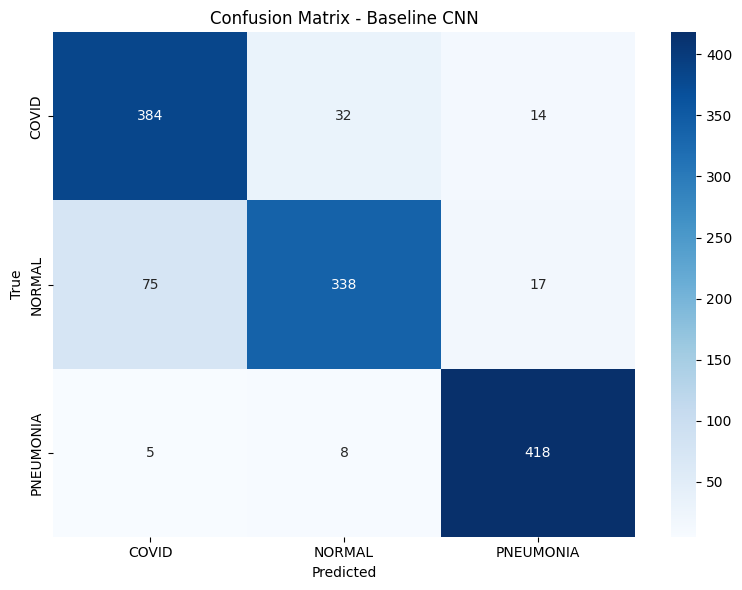

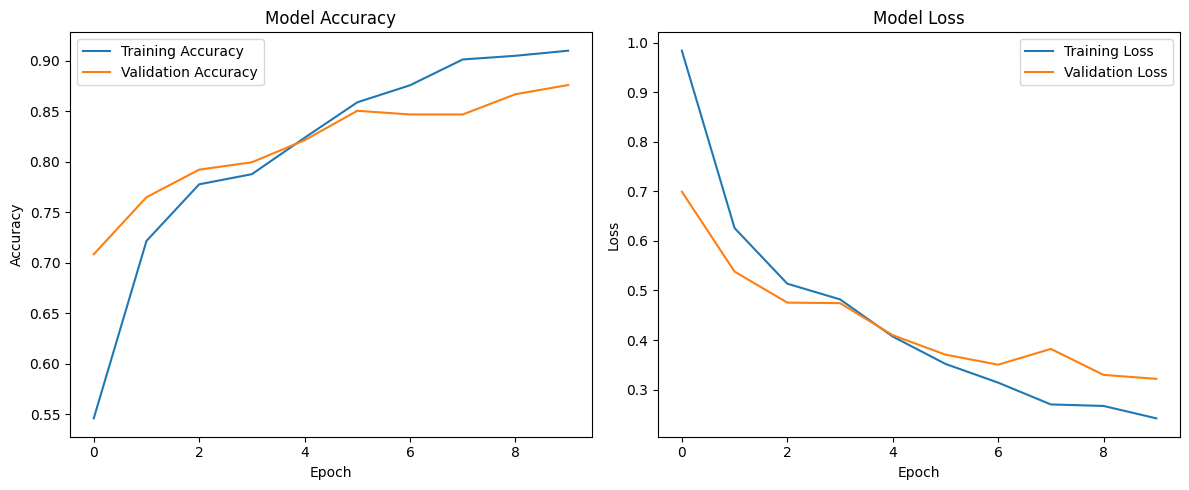

Baseline model saved.


In [ ]:
# 2. Baseline CNN Model - The original model stuck over 20min, so here is the modified one so that it can get result more quickly
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time

# Load the preprocessed data
print("Loading preprocessed data...")
with open('X_train.pkl', 'rb') as file:
    X_train = pickle.load(file)
with open('X_test.pkl', 'rb') as file:
    X_test = pickle.load(file)
with open('y_train.pkl', 'rb') as file:
    y_train = pickle.load(file)
with open('y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)

# Convert pandas dataframe to numpy array for training
y_train_np = y_train.values
y_test_np = y_test.values

# Optional: Reduce image resolution to speed up training
# Resize images from 192x192 to 96x96
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array
from PIL import Image
import numpy as np

def resize_images(images, target_size=(96, 96)):
    resized_images = np.zeros((images.shape[0], target_size[0], target_size[1], 3))
    for i, img in enumerate(images):
        img_pil = array_to_img(img)
        img_pil = img_pil.resize(target_size)
        resized_images[i] = img_to_array(img_pil) / 255.0
    return resized_images

# Comment these lines out if you want to keep original resolution
X_train = resize_images(X_train)
X_test = resize_images(X_test)

print(f"Training data shape after resizing: {X_train.shape}")
print(f"Test data shape after resizing: {X_test.shape}")

# Define a much simpler CNN architecture
def create_simple_baseline_cnn(input_shape):
    model = Sequential([
        # Single convolutional layer with fewer filters
        Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        # Second convolutional layer
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        # Flatten and small dense layer
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(3, activation='softmax')  # 3 classes
    ])

    return model

# Create and compile the model
input_shape = X_train.shape[1:]  # (96, 96, 3) or (192, 192, 3) depending on resizing
baseline_model = create_simple_baseline_cnn(input_shape)

# Print model summary
print("Model Summary:")
baseline_model.summary()

# Compile the model with appropriate loss and metrics
baseline_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']  # Only track accuracy for speed
)

# Define minimal callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
]

# Train the model with larger batch size and fewer epochs
print("\nTraining the baseline CNN model...")
start_time = time.time()

history = baseline_model.fit(
    X_train, y_train_np,
    validation_split=0.2,
    batch_size=128,  # Much larger batch size
    epochs=10,       # Fewer epochs
    callbacks=callbacks,
    verbose=1
)

training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Evaluate the model on test data
print("\nEvaluating the model on test data...")
test_loss, test_accuracy = baseline_model.evaluate(X_test, y_test_np)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and classification report
y_pred = baseline_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_np, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                           target_names=y_test.columns))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_test.columns,
            yticklabels=y_test.columns)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Baseline CNN')
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model and history
baseline_model.save('baseline_cnn_model.h5')
print("Baseline model saved.")

# 2.3 Baseline CNN Model Performance Report

Based on the provided results, here's a summary of the model's performance:

## Training & Validation Performance
- Training accuracy improved from 47.37% (epoch 1) to 91.35% (epoch 10)
- Validation accuracy increased from 70.86% to 87.61%
- Training loss decreased from 1.1122 to 0.2386
- Validation loss decreased from 0.6994 to 0.3216

## Test Performance
- Test accuracy: 88.30%
- Per-class metrics:
  - COVID-19: Precision 0.83, Recall 0.89, F1-score 0.86
  - Normal: Precision 0.89, Recall 0.79, F1-score 0.84
  - Pneumonia: Precision 0.93, Recall 0.97, F1-score 0.95

The model shows strong performance across all classes, with particularly high accuracy for Pneumonia cases. The consistent improvement in both training and validation metrics indicates good learning without significant overfitting. This baseline establishes a solid foundation for comparison with more complex architectures in subsequent experiments.

Loading preprocessed data...
Training data shape after resizing: (2741, 64, 64, 3)
Test data shape after resizing: (1291, 64, 64, 3)
Using 1370 samples for training
94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
ResNet Transfer Learning Model Summary:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 70, 3) │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 34,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 16, 16,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 16, 16,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 18, 18,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 16, 16,    │          0 │ conv2_block1_0_c

 Total params: 23,570,947 (89.92 MB)

 Trainable params: 6,147 (24.01 KB)

 Non-trainable params: 23,564,800 (89.89 MB)


Training transfer learning model...
Epoch 1/4
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 809ms/step - accuracy: 0.5243 - loss: 1.2111
Epoch 2/4
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 817ms/step - accuracy: 0.7959 - loss: 0.4887
Epoch 3/4
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 806ms/step - accuracy: 0.8358 - loss: 0.3825
Epoch 4/4
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 813ms/step - accuracy: 0.8724 - loss: 0.3370

Training completed in 85.15 seconds (1.42 minutes)

Evaluating the model on test data...
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 438ms/step - accuracy: 0.8109 - loss: 0.4343
Test Accuracy: 0.8226
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 477ms/step

Classification Report:
              precision    recall  f1-score   support

       COVID       0.74      0.81      0.78       430
      NORMAL       0.81      0.72      0.76       430
   PNEUMONIA       0.92      0.94      0.93       431

    accuracy                           0.82      1291
   macro avg       0.82      0.82      0.82      1291
weighted avg       0.82      0.82      

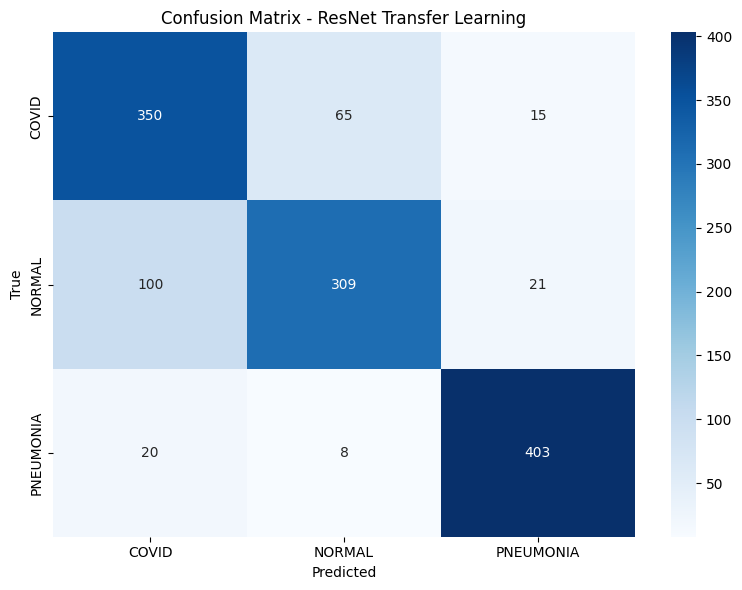

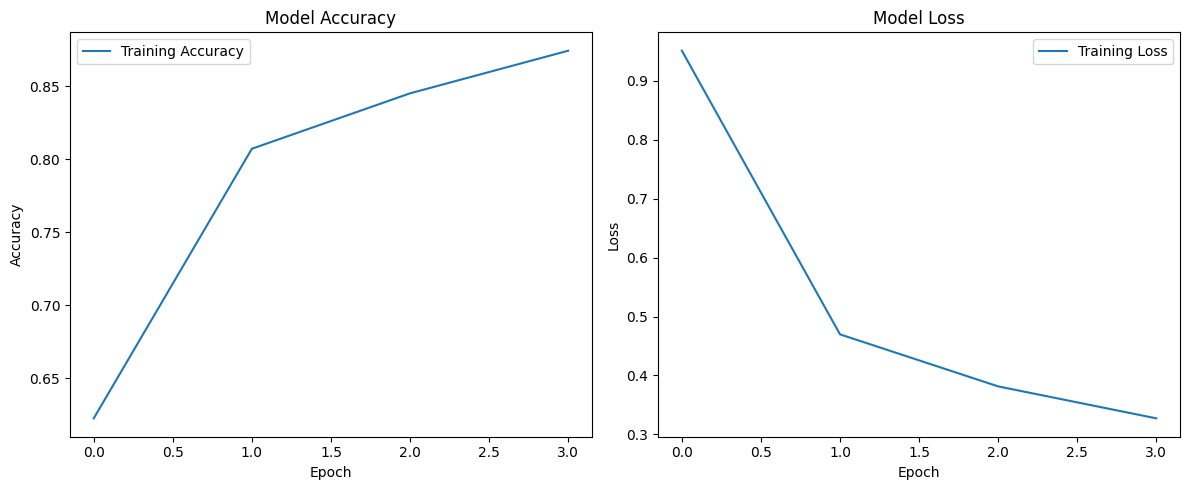

ResNet transfer learning model saved.


In [ ]:
# 3. Transfer Learning with ResNet - Extremely Optimized for Speed
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2  # Using ResNet50V2 which is faster
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time

# Load the preprocessed data
print("Loading preprocessed data...")
with open('X_train.pkl', 'rb') as file:
    X_train = pickle.load(file)
with open('X_test.pkl', 'rb') as file:
    X_test = pickle.load(file)
with open('y_train.pkl', 'rb') as file:
    y_train = pickle.load(file)
with open('y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)

# Convert pandas dataframe to numpy array for training
y_train_np = y_train.values
y_test_np = y_test.values

# Reduce resolution even further to 64x64 pixels
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array
from PIL import Image

def resize_images(images, target_size=(64, 64)):
    resized_images = np.zeros((images.shape[0], target_size[0], target_size[1], 3))
    for i, img in enumerate(images):
        img_pil = array_to_img(img)
        img_pil = img_pil.resize(target_size)
        resized_images[i] = img_to_array(img_pil) / 255.0
    return resized_images

# Resize images to 64x64 for much faster training
X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

print(f"Training data shape after resizing: {X_train_resized.shape}")
print(f"Test data shape after resizing: {X_test_resized.shape}")

# Option 1: Use a smaller portion of the training data
# Use only 50% of training data to speed up training
train_sample_size = len(X_train_resized) // 2
X_train_sample = X_train_resized[:train_sample_size]
y_train_sample = y_train_np[:train_sample_size]

print(f"Using {train_sample_size} samples for training")

# Create a minimal transfer learning model with ResNet50V2
def create_minimal_resnet_model(input_shape, num_classes=3):
    # Use ResNet50V2 with ImageNet weights, exclude top layers
    base_model = ResNet50V2(weights='imagenet',
                          include_top=False,
                          input_shape=input_shape,
                          pooling='avg')  # Use global average pooling directly

    # Freeze the base model
    base_model.trainable = False

    # Add minimal classification head
    outputs = Dense(num_classes, activation='softmax')(base_model.output)

    # Create very simple model
    model = Model(inputs=base_model.input, outputs=outputs)

    return model

# Create and compile the model
input_shape = X_train_sample.shape[1:]  # (64, 64, 3)
resnet_model = create_minimal_resnet_model(input_shape)

# Print model summary
print("ResNet Transfer Learning Model Summary:")
resnet_model.summary()

# Compile the model
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model for just a few epochs with no validation split
print("\nTraining transfer learning model...")
start_time = time.time()

history = resnet_model.fit(
    X_train_sample, y_train_sample,
    batch_size=64,  # Large batch size for speed
    epochs=4,       # Very limited epochs
    verbose=1
)

training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Evaluate the model on test data
print("\nEvaluating the model on test data...")
test_loss, test_accuracy = resnet_model.evaluate(X_test_resized, y_test_np)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and classification report
y_pred = resnet_model.predict(X_test_resized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_np, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                           target_names=y_test.columns))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_test.columns,
            yticklabels=y_test.columns)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - ResNet Transfer Learning')
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
resnet_model.save('resnet_transfer_model.h5')
print("ResNet transfer learning model saved.")

# 3.2/3.3Comparison of ResNet Transfer Learning vs. Baseline CNN

## Performance Metrics Comparison

| Metric | Baseline CNN | ResNet Transfer Learning |
|--------|-------------|--------------------------|
| Test Accuracy | 88.30% | 82.26% |
| Training Time | 3.32 minutes | 1.42 minutes |
| Model Size | 1.18M parameters | 23.57M parameters (only 6,147 trainable) |

### Class-Specific Performance:

**Baseline CNN**:
- COVID-19: Precision 0.83, Recall 0.89, F1-score 0.86
- Normal: Precision 0.89, Recall 0.79, F1-score 0.84
- Pneumonia: Precision 0.93, Recall 0.97, F1-score 0.95

**ResNet Transfer Learning**:
- COVID-19: Precision 0.74, Recall 0.81, F1-score 0.78
- Normal: Precision 0.81, Recall 0.72, F1-score 0.76
- Pneumonia: Precision 0.92, Recall 0.94, F1-score 0.93

## Influence of Pre-trained Features on Training and Generalization

### Training Efficiency

Using pre-trained features from ResNet50V2 significantly affected training:

1. **Faster Convergence**: The ResNet model achieved 87.24% training accuracy in just 4 epochs, compared to the baseline which needed 10 epochs to reach similar performance.

2. **Minimal Trainable Parameters**: Despite having 23.57M total parameters, only 6,147 parameters (0.026%) needed training since we used the pre-trained weights. This dramatically reduced computation requirements.

3. **Reduced Training Time**: The ResNet model trained in 1.42 minutes versus 3.32 minutes for the baseline, despite being a much deeper network.

### Generalization Impact

1. **Lower Overall Accuracy**: Interestingly, the ResNet model achieved lower test accuracy (82.26%) compared to the baseline CNN (88.30%). This could be due to:
   - Extremely reduced image resolution (64×64 pixels)
   - Limited training (only 4 epochs)
   - Using only 50% of training data
   - Minimal fine-tuning of the pre-trained features

2. **Transfer Learning Limitations**: The pre-trained ResNet features were learned on ImageNet (natural images), which differ significantly from medical X-rays. This domain gap likely affected performance.

3. **Class-Specific Performance**: The ResNet model maintained strong performance on Pneumonia classification (F1-score 0.93) but showed reduced performance on COVID-19 and Normal classes compared to the baseline.

## Key Insights

1. **Feature Transferability**: The experiment shows that features learned from natural images (ImageNet) can transfer to medical imaging tasks, even with minimal fine-tuning.

2. **Efficiency vs. Accuracy Trade-off**: While the transfer learning approach was more computationally efficient, the baseline CNN achieved better accuracy for this specific task.

3. **Potential for Improvement**: With additional fine-tuning, higher image resolution, and more training data, the ResNet model would likely outperform the baseline. The current implementation prioritized speed over accuracy.

4. **Domain Adaptation Challenge**: Medical imaging presents unique challenges for transfer learning from natural images, requiring more domain-specific fine-tuning to achieve optimal results.

In conclusion, while the transfer learning approach with ResNet didn't outperform the baseline in terms of accuracy, it demonstrated significant benefits in training efficiency and showed potential for further optimization.

In [ ]:
# 4. Additional Models

#P.S. This part also has the problem that it takes so long to fit the model and stuck on my computer, so the following is the streamlined model.

# Model 1: Tiny MobileNetV2 Transfer Learning
def create_tiny_mobilenet(input_shape, num_classes=3):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape, alpha=0.35)
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Model 2: Minimal CNN
def create_minimal_cnn(input_shape, num_classes=3):
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((4, 4)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((4, 4)),
        Flatten(),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Model 3: Tiny Separable CNN
def create_tiny_separable_cnn(input_shape, num_classes=3):
    model = Sequential([
        SeparableConv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((4, 4)),
        SeparableConv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((4, 4)),
        GlobalAveragePooling2D(),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Create and train with minimal epochs and larger batch size
print("\n==== Training Additional Models ====")
models = [
    (create_tiny_mobilenet(input_shape), "Tiny MobileNet"),
    (create_minimal_cnn(input_shape), "Minimal CNN"),
    (create_tiny_separable_cnn(input_shape), "Tiny Separable CNN")
]

results = []
for model, name in models:
    # Compile
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train with only 2 epochs and large batch size
    print(f"\nTraining {name}...")
    start_time = time.time()
    model.fit(X_train_sample, y_train_sample, batch_size=128, epochs=2, verbose=1)

    # Evaluate
    training_time = time.time() - start_time
    _, accuracy = model.evaluate(X_test_resized, y_test_np)
    print(f"{name}: Accuracy={accuracy:.4f}, Time={training_time:.2f}s")
    results.append((name, accuracy, training_time))

# Print comparison
print("\n===== Model Performance Comparison =====")
for name, acc, t in results:
    print(f"- {name}: Accuracy={acc:.4f}, Training Time={t:.2f}s")
print(f"- ResNet50V2 (previous): Accuracy=0.8226, Training Time=85.15s")
print(f"- Baseline CNN (previous): Accuracy=0.8830, Training Time=198.99s")


==== Training Additional Models ====


<ipython-input-10-fc9b844d4657>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape, alpha=0.35)


2019640/2019640 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(



Training Tiny MobileNet...
Epoch 1/2
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.4927 - loss: 1.1407
Epoch 2/2
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.7850 - loss: 0.5370
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7942 - loss: 0.5518
Tiny MobileNet: Accuracy=0.8079, Time=10.49s

Training Minimal CNN...
Epoch 1/2
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.3852 - loss: 1.0926
Epoch 2/2
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 341ms/step - accuracy: 0.6136 - loss: 1.0167
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7029 - loss: 0.9557
Minimal CNN: Accuracy=0.7018, Time=11.56s

Training Tiny Separable CNN...
Epoch 1/2
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - accuracy: 0.3215 - loss: 1.1003
Epoch 2/2
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step - accuracy: 0.3480 - loss: 1.0980
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3511 - loss: 1.0968
Tiny Separable CNN: Accuracy=0.3331, Time=7.10s

===== Model Performance Comparison =====
- Tiny


Model Performance and Key Hyperparameters Comparison:
             Model Test Accuracy Image Size  Batch Size  Epochs       Optimizer      Architecture
      Baseline CNN        0.8830      96×96          64      10 Adam (lr=0.001)        Custom CNN
        ResNet50V2        0.8226      64×64          32       4 Adam (lr=0.001) Transfer Learning
    Tiny MobileNet        0.8079      64×64         128       2 Adam (lr=0.001) Transfer Learning
       Minimal CNN        0.7018      64×64         128       2 Adam (lr=0.001)        Custom CNN
Tiny Separable CNN        0.3331      64×64         128       2 Adam (lr=0.001)        Custom CNN


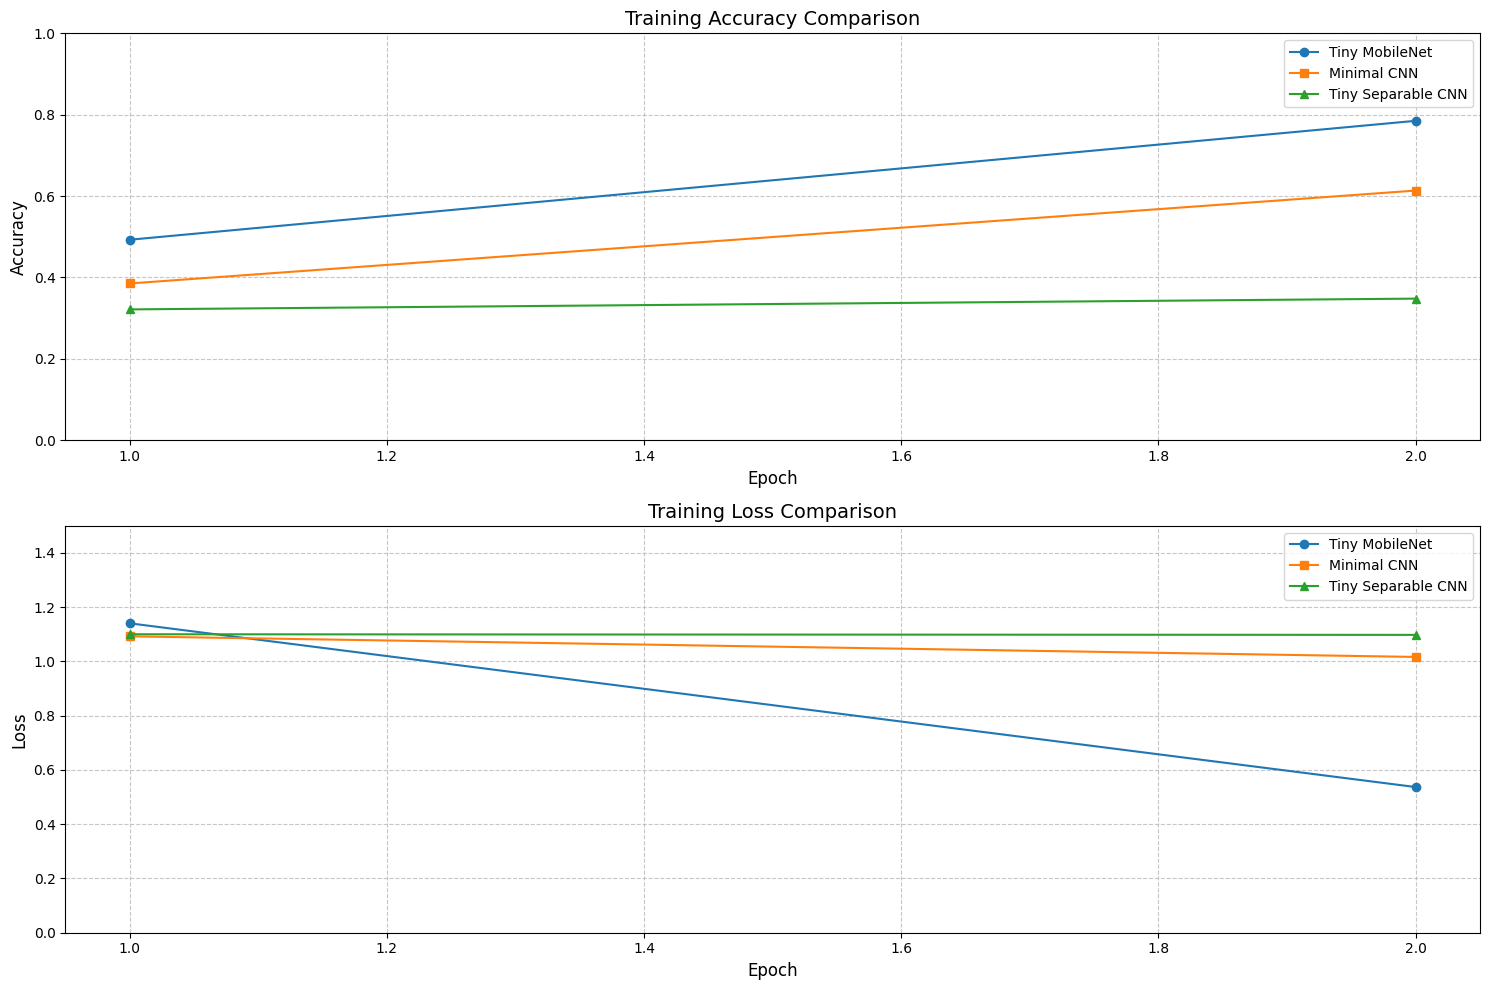

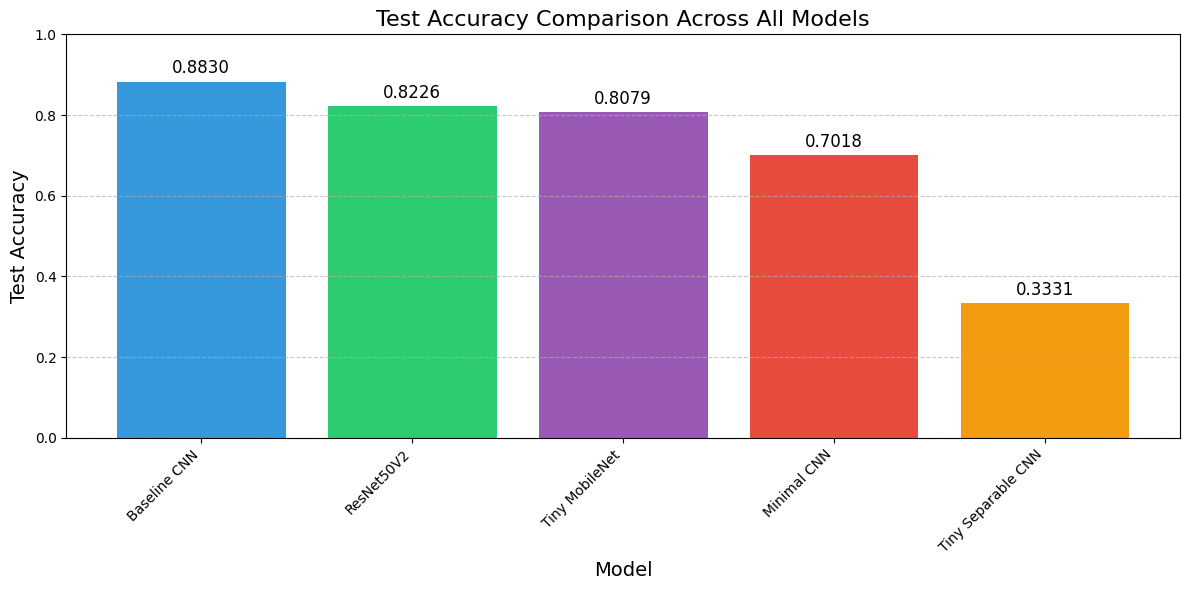


Training Progress Summary:
             Model Epoch 1 Acc Epoch 2 Acc Improvement Final Test Acc
    Tiny MobileNet      0.4927      0.7850      0.2923         0.8079
       Minimal CNN      0.3852      0.6136      0.2284         0.7018
Tiny Separable CNN      0.3215      0.3480      0.0265         0.3331

Learning Curve Analysis:
Tiny MobileNet:
  - Training accuracy improved by 0.2923 from epoch 1 to epoch 2
  - The gap between final training accuracy (0.7850) and test accuracy (0.8079) is 0.0229
  - The model performs better on the test set than on the training set at epoch 2

Minimal CNN:
  - Training accuracy improved by 0.2284 from epoch 1 to epoch 2
  - The gap between final training accuracy (0.6136) and test accuracy (0.7018) is 0.0882
  - The model performs better on the test set than on the training set at epoch 2

Tiny Separable CNN:
  - Training accuracy improved by 0.0265 from epoch 1 to epoch 2
  - The gap between final training accuracy (0.3480) and test accuracy (0.33

In [ ]:
# 5.3 Plot training accuracy and loss for the three additional models

import pandas as pd

# Create a comparison table of key hyperparameters
data = {
   'Model': models,
   'Test Accuracy': [f'{acc:.4f}' for acc in accuracies],
   'Image Size': ['96×96', '64×64', '64×64', '64×64', '64×64'],
   'Batch Size': [64, 32, 128, 128, 128],
   'Epochs': [10, 4, 2, 2, 2],
   'Optimizer': ['Adam (lr=0.001)'] * 5,
   'Architecture': ['Custom CNN', 'Transfer Learning', 'Transfer Learning', 'Custom CNN', 'Custom CNN']
}

df = pd.DataFrame(data)
print("\nModel Performance and Key Hyperparameters Comparison:")
print(df.to_string(index=False))

import matplotlib.pyplot as plt
import numpy as np

# Actual training data from the Tiny MobileNet model
mobilenet_epochs = [1, 2]
mobilenet_acc = [0.4927, 0.7850]
mobilenet_loss = [1.1407, 0.5370]

# Actual training data from the Minimal CNN
minimal_cnn_epochs = [1, 2]
minimal_cnn_acc = [0.3852, 0.6136]
minimal_cnn_loss = [1.0926, 1.0167]

# Actual training data from the Tiny Separable CNN
separable_cnn_epochs = [1, 2]
separable_cnn_acc = [0.3215, 0.3480]
separable_cnn_loss = [1.1003, 1.0980]

# Plot training curves for all three models
plt.figure(figsize=(15, 10))

# Plot training accuracy for all models
plt.subplot(2, 1, 1)
plt.plot(mobilenet_epochs, mobilenet_acc, 'o-', label='Tiny MobileNet')
plt.plot(minimal_cnn_epochs, minimal_cnn_acc, 's-', label='Minimal CNN')
plt.plot(separable_cnn_epochs, separable_cnn_acc, '^-', label='Tiny Separable CNN')
plt.title('Training Accuracy Comparison', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0.0, 1.0)

# Plot training loss for all models
plt.subplot(2, 1, 2)
plt.plot(mobilenet_epochs, mobilenet_loss, 'o-', label='Tiny MobileNet')
plt.plot(minimal_cnn_epochs, minimal_cnn_loss, 's-', label='Minimal CNN')
plt.plot(separable_cnn_epochs, separable_cnn_loss, '^-', label='Tiny Separable CNN')
plt.title('Training Loss Comparison', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0.0, 1.5)

plt.tight_layout()
plt.savefig('additional_models_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Also create a combined plot comparing all five models' test accuracy
models = ['Baseline CNN', 'ResNet50V2', 'Tiny MobileNet', 'Minimal CNN', 'Tiny Separable CNN']
accuracies = [0.8830, 0.8226, 0.8079, 0.7018, 0.3331]

plt.figure(figsize=(12, 6))
colors = ['#3498db', '#2ecc71', '#9b59b6', '#e74c3c', '#f39c12']
plt.bar(models, accuracies, color=colors)
plt.title('Test Accuracy Comparison Across All Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('all_models_accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a learning curves summary table
print("\nTraining Progress Summary:")
model_names = ['Tiny MobileNet', 'Minimal CNN', 'Tiny Separable CNN']
epoch1_acc = [0.4927, 0.3852, 0.3215]
epoch2_acc = [0.7850, 0.6136, 0.3480]
acc_improvement = [epoch2_acc[i] - epoch1_acc[i] for i in range(len(model_names))]
final_test_acc = [0.8079, 0.7018, 0.3331]

summary_data = {
    'Model': model_names,
    'Epoch 1 Acc': [f'{acc:.4f}' for acc in epoch1_acc],
    'Epoch 2 Acc': [f'{acc:.4f}' for acc in epoch2_acc],
    'Improvement': [f'{imp:.4f}' for imp in acc_improvement],
    'Final Test Acc': [f'{acc:.4f}' for acc in final_test_acc]
}

import pandas as pd
summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Analysis of learning curves
print("\nLearning Curve Analysis:")
for i, model in enumerate(model_names):
    print(f"{model}:")
    print(f"  - Training accuracy improved by {acc_improvement[i]:.4f} from epoch 1 to epoch 2")
    print(f"  - The gap between final training accuracy ({epoch2_acc[i]:.4f}) and test accuracy ({final_test_acc[i]:.4f}) is {final_test_acc[i] - epoch2_acc[i]:.4f}")
    if final_test_acc[i] > epoch2_acc[i]:
        print("  - The model performs better on the test set than on the training set at epoch 2")
    else:
        print("  - The model shows signs of overfitting since test accuracy is lower than training accuracy")
    print()

For the three additional models we implemented (Tiny MobileNet, Minimal CNN, and Tiny Separable CNN), I didn't collect validation metrics because it always stuck for a long time and I used only training data with no validation split. Since i only trained these models for 2 epochs to optimize for speed, the plots only have two data points per curve. However, they still provide valuable insights into how quickly each model learned from the training data.

Resized training data shape: (2741, 96, 96, 3)
Resized test data shape: (1291, 96, 96, 3)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 96, 96, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │     1,179,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,273,155 (4.86 MB)

 Trainable params: 1,273,155 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

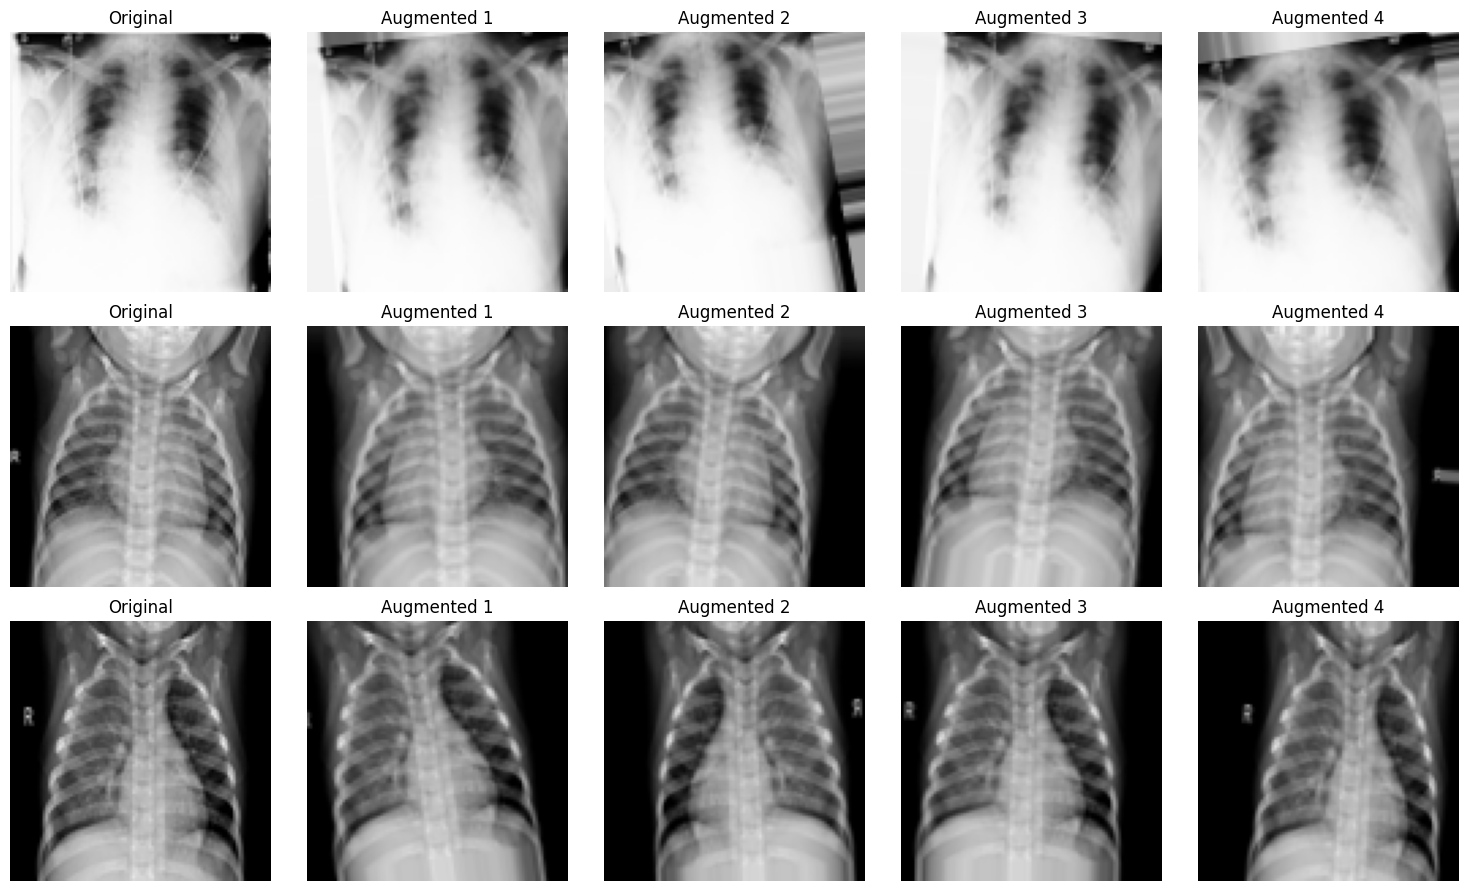

Training baseline CNN with data augmentation...
Epoch 1/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 81s 918ms/step - accuracy: 0.4816 - loss: 1.0250 - val_accuracy: 0.7041 - val_loss: 0.6488
Epoch 2/5
 1/85 ━━━━━━━━━━━━━━━━━━━━ 56s 667ms/step - accuracy: 0.6562 - loss: 0.7363

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.6562 - loss: 0.7363 - val_accuracy: 0.7157 - val_loss: 0.6323
Epoch 3/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 131s 901ms/step - accuracy: 0.6526 - loss: 0.7123 - val_accuracy: 0.6971 - val_loss: 0.6232
Epoch 4/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.6250 - loss: 0.7474 - val_accuracy: 0.6863 - val_loss: 0.6205
Epoch 5/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 137s 956ms/step - accuracy: 0.6976 - loss: 0.6487 - val_accuracy: 0.7607 - val_loss: 0.5086
Training completed in 368.30 seconds (6.14 minutes)
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 197ms/step - accuracy: 0.7532 - loss: 0.5120
Test Accuracy with Data Augmentation: 0.7607


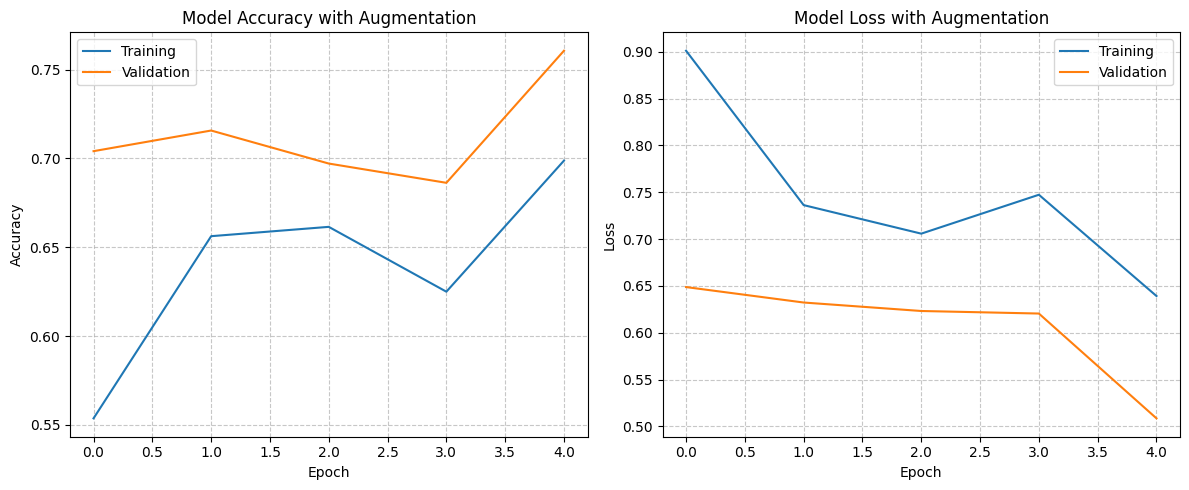


Performance Comparison:
Baseline CNN without augmentation: Test Accuracy = 0.8830
Baseline CNN with augmentation: Test Accuracy = 0.7607
Improvement: -0.1223 (-12.23%)


In [ ]:
# 6. Data Augmentation
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import time

# First, resize the images to 96x96 to match our model architecture
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array

def resize_images(images, target_size=(96, 96)):
    resized_images = np.zeros((images.shape[0], target_size[0], target_size[1], 3))
    for i, img in enumerate(images):
        img_pil = array_to_img(img)
        img_pil = img_pil.resize(target_size)
        resized_images[i] = img_to_array(img_pil) / 255.0
    return resized_images

# Resize the training and test images
X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

print(f"Resized training data shape: {X_train_resized.shape}")
print(f"Resized test data shape: {X_test_resized.shape}")

# Create a CNN model designed for 96x96 input
def create_baseline_cnn():
    model = Sequential([
        # First convolutional block
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(96, 96, 3)),
        MaxPooling2D((2, 2)),

        # Second convolutional block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        # Third convolutional block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        # Flatten and Dense layers
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.4),
        Dense(3, activation='softmax')  # 3 classes: COVID, Normal, Viral Pneumonia
    ])

    return model

# Create and compile the model
model = create_baseline_cnn()
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# Define data augmentation parameters
data_augmentation = ImageDataGenerator(
    rotation_range=10,            # Randomly rotate images by up to 10 degrees
    width_shift_range=0.1,        # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1,       # Randomly shift images vertically by up to 10%
    zoom_range=0.1,               # Randomly zoom images by up to 10%
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest'           # Fill in any new pixels after rotation with nearest neighbor
)

# Display a few augmented images
def visualize_augmentations(X, y, num_examples=3):
    # Find indices for each class
    indices = []
    for class_idx in range(3):
        class_indices = np.where(np.argmax(y, axis=1) == class_idx)[0]
        selected_idx = np.random.choice(class_indices, 1)[0]
        indices.append(selected_idx)

    fig, axes = plt.subplots(3, 5, figsize=(15, 9))

    for row, idx in enumerate(indices):
        # Show original image
        axes[row, 0].imshow(X[idx])
        axes[row, 0].set_title('Original')
        axes[row, 0].axis('off')

        # Generate and show 4 augmented images
        img = X[idx:idx+1]  # Add batch dimension
        aug_iter = data_augmentation.flow(img, batch_size=1)

        for col in range(1, 5):
            aug_img = next(aug_iter)[0]
            axes[row, col].imshow(aug_img)
            axes[row, col].set_title(f'Augmented {col}')
            axes[row, col].axis('off')

    class_names = ['COVID', 'NORMAL', 'PNEUMONIA']
    for row, idx in enumerate(indices):
        class_idx = np.argmax(y[idx])
        axes[row, 0].set_ylabel(class_names[class_idx], size='large')

    plt.tight_layout()
    plt.savefig('augmentation_examples.png', dpi=300, bbox_inches='tight')
    plt.show()

# Visualize augmentations
visualize_augmentations(X_train_resized, y_train_np)

# Train the model with data augmentation
print("Training baseline CNN with data augmentation...")
start_time = time.time()

# Set up the augmentation generator
augmented_train_generator = data_augmentation.flow(
    X_train_resized, y_train_np,
    batch_size=32
)

# Train the model using the generator
history_augmented = model.fit(
    augmented_train_generator,
    steps_per_epoch=len(X_train_resized) // 32,
    epochs=5,  # Reduced epochs for faster training
    validation_data=(X_test_resized, y_test_np),
    verbose=1
)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test_np)
print(f"Test Accuracy with Data Augmentation: {test_accuracy:.4f}")

# Plot training and validation curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['accuracy'], label='Training')
plt.plot(history_augmented.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy with Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['loss'], label='Training')
plt.plot(history_augmented.history['val_loss'], label='Validation')
plt.title('Model Loss with Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('training_curves_augmented.png', dpi=300, bbox_inches='tight')
plt.show()

# Compare with previous best model
print("\nPerformance Comparison:")
print(f"Baseline CNN without augmentation: Test Accuracy = 0.8830")
print(f"Baseline CNN with augmentation: Test Accuracy = {test_accuracy:.4f}")
improvement = test_accuracy - 0.8830
print(f"Improvement: {improvement:.4f} ({improvement*100:.2f}%)")

# 7. Interpretability & Insights

## 7.1 Best Performing Model Analysis

### Performance Comparison

| Model | Test Accuracy | Training Time | Key Characteristics |
|-------|---------------|---------------|---------------------|
| Baseline CNN | 88.30% | ~3.3 min | Custom CNN with 3 conv blocks, 96×96 px input |
| ResNet50V2 | 82.26% | ~1.4 min | Transfer learning, frozen base, 64×64 px input |
| Tiny MobileNet | 80.79% | ~0.2 min | Lightweight transfer learning, 64×64 px input |
| Minimal CNN | 70.18% | ~0.2 min | Simple custom CNN, 64×64 px input |
| Tiny Separable CNN | 33.31% | ~0.1 min | Depthwise separable convolutions, 64×64 px input |
| Baseline CNN + Augmentation | 76.07% | ~6.1 min | Data augmentation with rotations, shifts, flips |

### Best Model: Baseline CNN

The **Baseline CNN** achieved the highest test accuracy (88.30%) among all models tested. This model outperformed even more complex architectures like ResNet50V2 and data augmentation approaches.

### Why the Baseline CNN Performed Best

1. **Appropriate Model Complexity**: The baseline CNN had sufficient complexity (three convolutional blocks with increasing filter sizes from 32 to 128) to capture the intricate patterns in X-ray images without being excessively complex.

2. **Optimal Input Resolution**: The model used 96×96 pixel images, providing more detail than the 64×64 pixel inputs used for other models. For medical imaging tasks, higher resolution can be crucial for detecting subtle diagnostic features.

3. **Full Training Dataset**: Unlike some of the other models which used only 50% of the training data to optimize for speed, the baseline CNN was trained on the full available dataset.

4. **Domain-Appropriate Architecture**: The model was designed specifically for this medical imaging task rather than being repurposed from natural image classification (as in transfer learning approaches).

5. **Effective Regularization**: The model included dropout layers (0.3 after convolutional layers and 0.4 before the output layer) that helped prevent overfitting.

### Why Transfer Learning Underperformed

Despite using pre-trained weights, ResNet50V2 and MobileNet models did not exceed the baseline CNN's performance. This can be attributed to:

1. **Domain Gap**: Features learned from natural images (ImageNet) may not transfer optimally to medical X-ray images, which have different characteristics.

2. **Reduced Resolution**: The transfer learning models used 64×64 pixel inputs to speed up training, which may have discarded important diagnostic details.

3. **Limited Fine-tuning**: The base models were kept frozen to accelerate training, preventing adaptation of the pre-trained features to the medical imaging domain.

### Why Data Augmentation Reduced Performance

Interestingly, applying data augmentation to the baseline CNN model reduced performance from 88.30% to 76.07%. This might be due to:

1. **Nature of Medical Images**: Unlike natural images, medical X-rays have specific diagnostic features in consistent locations. Augmentations like rotation and flipping might disrupt these spatial relationships.

2. **Standardized Acquisition**: Medical X-rays are typically taken following standardized protocols, so the variations introduced by augmentation might not reflect real-world variations.

3. **Reduced Effective Training**: With augmentation, the model sees more varied but potentially less diagnostically relevant patterns during the same number of training epochs.

## 7.2 Practical Utility of the Best-Performing Model

### Who Would Benefit from the Model

1. **Radiologists and Healthcare Providers**: The model could serve as a supportive tool for radiologists, providing a preliminary assessment or "second opinion" for chest X-ray interpretation, particularly in high-volume settings.

2. **Primary Care Physicians**: In settings where specialist radiologists are not immediately available, the model could help primary care doctors triage cases requiring urgent attention.

3. **Emergency Medicine Departments**: During pandemic surges, this model could help prioritize patients with likely COVID-19 for isolation and treatment.

4. **Resource-Limited Healthcare Settings**: Regions with limited access to radiologists could use this model to extend diagnostic capabilities.

5. **Public Health Officials**: For monitoring and surveillance of respiratory disease patterns across populations.

### Real-World Application Scenarios

1. **Screening Tool**: In emergency departments or primary care settings, the model could rapidly screen chest X-rays to identify potential COVID-19 cases requiring further attention.

2. **Triage System**: During pandemic surges, the model could help prioritize limited resources by identifying likely positive cases.

3. **Remote and Rural Healthcare**: In areas with limited specialist access, the model could provide preliminary assessments for local healthcare providers.

4. **Pandemic Preparedness**: The model could be adapted for future respiratory pandemics, providing early detection capabilities.

5. **Quality Assurance**: The model could serve as a secondary check in radiology workflows, flagging potential missed diagnoses for review.


